In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
msdata = pd.read_csv('msft_stockprices_dataset.csv')

In [3]:
msdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
Date           1009 non-null object
High Price     1009 non-null float64
Low Price      1009 non-null float64
Open Price     1009 non-null float64
Close Price    1009 non-null float64
Volume         1009 non-null float64
dtypes: float64(5), object(1)
memory usage: 47.4+ KB


In [4]:
msdata.columns

Index(['Date', 'High Price', 'Low Price', 'Open Price', 'Close Price',
       'Volume'],
      dtype='object')

In [5]:
msdata.isnull().any()

Date           False
High Price     False
Low Price      False
Open Price     False
Close Price    False
Volume         False
dtype: bool

In [6]:
msdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
Date           1009 non-null object
High Price     1009 non-null float64
Low Price      1009 non-null float64
Open Price     1009 non-null float64
Close Price    1009 non-null float64
Volume         1009 non-null float64
dtypes: float64(5), object(1)
memory usage: 47.4+ KB


In [7]:
msdata.describe()

,High Price,Low Price,Open Price,Close Price,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,64.456938,63.412567,63.937532,63.965709,2.989522e+07
std,19.100367,18.808177,18.978411,18.962861,1.525638e+07
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06
25%,48.220001,47.540001,47.880001,47.869999,2.128340e+07
50%,57.799999,57.209999,57.529999,57.560001,2.664050e+07
75%,74.419998,73.599998,73.989998,74.050003,3.414090e+07
max,112.779999,111.519997,111.690002,112.330002,2.025224e+08


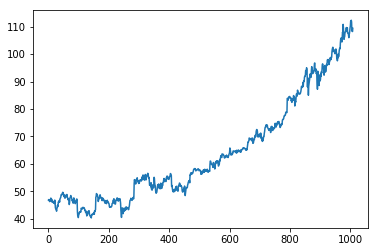

In [8]:
plt.plot(msdata["Close Price"])

In [9]:
used_features = ["High Price", "Low Price","Open Price","Volume"]

In [71]:
History = msdata[used_features].values
ClosePrice = msdata["Close Price"].values

In [72]:
X_train,X_test,y_train,y_test = train_test_split(History, ClosePrice, test_size=0.45, random_state=42)
dataModle=LinearRegression()
dataModle.fit(X_train,y_train)
y_predict = dataModle.predict(X_test)

Tolerance=0.05
CorrectNum = 0
CorrectRate = 0.00
Accuracy= 0.00

for i in range(len(y_predict)):
    Accuracy=abs(y_predict[i]-y_test[i])/y_test[i]
    #print("序列号:%d,预测值:%s, 真实值:%s,精度:%s" % (i, y_predict[i], y_test[i], accuracy))
    
    if Accuracy < Tolerance:
        CorrectNum =CorrectNum+1
    
CorrectRate = CorrectNum/len(y_predict)*100
print("预测准确率:%s,预测正确样本数:%s, 总测试样本数:%s" % (CorrectRate, CorrectNum, len(y_predict)))

预测准确率:100.0,预测正确样本数:455, 总测试样本数:455


In [122]:
def TestSizeParameter(Parameter_Test_Size):
    
    X_train,X_test,y_train,y_test = train_test_split(History, ClosePrice, test_size=Parameter_Test_Size, random_state=42)
    dataModle=LinearRegression()
    dataModle.fit(X_train,y_train)
    y_predict = dataModle.predict(X_test)
    
    global CorrectRate
    _Tolerance=0.05
    _CorrectNum = 0
    _Accuracy=0.00
    _CorrectRate = 0.00
    
    for _i in range(len(y_predict)):
        _Accuracy=abs(y_predict[_i]-y_test[_i])/y_test[_i]
        
        if _Accuracy < _Tolerance:
            _CorrectNum =  _CorrectNum + 1
        #print("序列号:%d,预测值:%s, 真实值:%s,精度:%s" % (_i, y_predict[_i], y_test[_i], _Accuracy))   
    
    _CorrectRate = _CorrectNum/len(y_predict)*100
    CorrectRate=_CorrectRate
    #print("预测准确率:%s,预测正确样本数:%s, 总测试样本数:%s" % (_CorrectRate,_CorrectNum, len(y_predict)))
    return CorrectRate

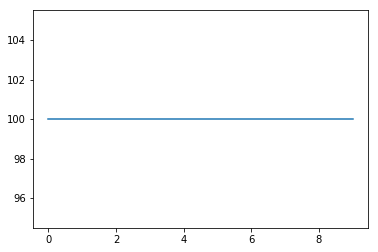

In [123]:
t=[]
for i in [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]:
    t.append(TestSizeParameter(i))
plt.plot(t)